## Day 1 – Data Cleaning & Data Quality
Dataset: Chicago Food Inspections

Goal:
- Identify data quality issues
- Clean and standardize the dataset
- Prepare it for analysis

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset

In [4]:
df = pd.read_csv("food-inspections.csv")

In [5]:
df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,...,Results,Violations,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards
0,2352683,CHIPOTLE MEXICAN GRILL,CHIPOTLE MEXICAN GRILL,2670642.0,Restaurant,Risk 1 (High),1025 W ADDISON ST,CHICAGO,IL,60613.0,...,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.947118,-87.655381,"{'latitude': '-87.6553811622124', 'longitude':...",NaN,NaN,NaN,NaN,NaN
1,2352734,CHILI'S T-I,CHILI'S (T1-B14),34169.0,Restaurant,Risk 1 (High),11601 W TOUHY AVE,CHICAGO,IL,60666.0,...,Pass,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,42.008536,-87.914428,"{'latitude': '-87.91442843927047', 'longitude'...",NaN,NaN,NaN,NaN,NaN
2,2352713,NICK'S FIRE GRILL STEAK & LEMONADE INC.,NICK'S FIRE GRILL STEAK & LEMONADE INC.,2699090.0,NaN,Risk 1 (High),2900 W 63RD ST,CHICAGO,IL,60629.0,...,Not Ready,NaN,41.779190,-87.695892,"{'latitude': '-87.69589237398256', 'longitude'...",NaN,NaN,NaN,NaN,NaN
3,2352701,TAQUERIA BLUE LINE INC.,NaN,2703436.0,Restaurant,Risk 1 (High),3401 W BELMONT AVE,CHICAGO,IL,60618.0,...,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.939168,-87.712546,"{'latitude': '-87.71254599117191', 'longitude'...",NaN,NaN,NaN,NaN,NaN
4,2352727,PORTAGE PARK DAY NURSERY,MOSAIC EARLY CHILDHOOD ACADEMY,2215815.0,Children's Services Facility,Risk 1 (High),5332-5334 W ADDISON ST,CHICAGO,IL,60641.0,...,Pass,NaN,41.946065,-87.760722,"{'latitude': '-87.76072227616888', 'longitude'...",NaN,NaN,NaN,NaN,NaN


## Basic Data Understanding

In [6]:
df.shape

(196825, 22)

In [7]:
df.describe(include="all")

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,...,Results,Violations,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards
count,1.968250e+05,196825,194367,1.968080e+05,192057,196756,196825,196686,196783,196775.000000,...,196825,144559,196135.000000,196135.000000,196135,0.0,0.0,0.0,0.0,0.0
unique,NaN,27621,26346,NaN,491,4,18081,71,4,NaN,...,7,143613,NaN,NaN,16843,NaN,NaN,NaN,NaN,NaN
top,NaN,SUBWAY,SUBWAY,NaN,Restaurant,Risk 1 (High),11601 W TOUHY AVE,CHICAGO,IL,NaN,...,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,NaN,NaN,"{'latitude': '-87.91442843927047', 'longitude'...",NaN,NaN,NaN,NaN,NaN
freq,NaN,2699,3281,NaN,131254,141129,2612,195986,196780,NaN,...,106066,11,NaN,NaN,2623,NaN,NaN,NaN,NaN,NaN
mean,1.449379e+06,NaN,NaN,1.601134e+06,NaN,NaN,NaN,NaN,NaN,60628.741949,...,NaN,NaN,41.881231,-87.676819,NaN,NaN,NaN,NaN,NaN,NaN
std,6.355214e+05,NaN,NaN,8.963101e+05,NaN,NaN,NaN,NaN,NaN,121.926320,...,NaN,NaN,0.080846,0.058969,NaN,NaN,NaN,NaN,NaN,NaN
min,4.424700e+04,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,10014.000000,...,NaN,NaN,41.644670,-87.914428,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.150792e+06,NaN,NaN,1.225118e+06,NaN,NaN,NaN,NaN,NaN,60614.000000,...,NaN,NaN,41.834897,-87.707742,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.493299e+06,NaN,NaN,1.979973e+06,NaN,NaN,NaN,NaN,NaN,60625.000000,...,NaN,NaN,41.891980,-87.666812,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.009233e+06,NaN,NaN,2.240843e+06,NaN,NaN,NaN,NaN,NaN,60643.000000,...,NaN,NaN,41.939814,-87.634955,NaN,NaN,NaN,NaN,NaN,NaN


## Missing Value Analysis

In [8]:
missing = df.isnull().mean().sort_values(ascending=False) * 100
missing.head(10)

Community Areas               100.000000
Historical Wards 2003-2015    100.000000
Wards                         100.000000
Census Tracts                 100.000000
Zip Codes                     100.000000
Violations                     26.554554
Facility Type                   2.422456
AKA Name                        1.248825
Location                        0.350565
Latitude                        0.350565
dtype: float64

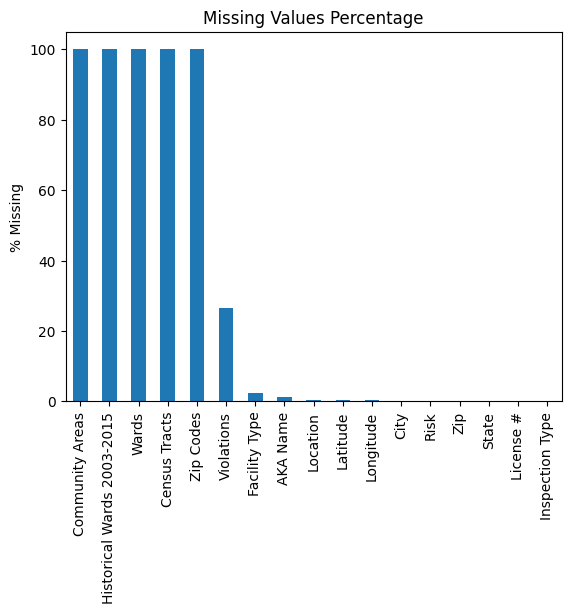

In [9]:
plt.figure()
missing[missing > 0].plot(kind="bar")
plt.title("Missing Values Percentage")
plt.ylabel("% Missing")
plt.show()

## Remove Duplicates

In [10]:
df.duplicated().sum()

np.int64(149)

In [11]:
df = df.drop_duplicates()

## Fix Date Columns

In [12]:
df['Inspection Date'] = pd.to_datetime(df['Inspection Date'], errors='coerce')

In [13]:
df['Year'] = df['Inspection Date'].dt.year

## Clean Categorical Text Columns

In [14]:
df['Results'] = df['Results'].str.upper().str.strip()
df['Facility Type'] = df['Facility Type'].str.title().str.strip()

In [15]:
df['Facility Type'] = df['Facility Type'].fillna('Unknown')

## Validate the Cleaning

In [16]:
df.isnull().sum()


Inspection ID                      0
DBA Name                           0
AKA Name                        2457
License #                         17
Facility Type                      0
Risk                              69
Address                            0
City                             139
State                             42
Zip                               50
Inspection Date                    0
Inspection Type                    1
Results                            0
Violations                     52234
Latitude                         689
Longitude                        689
Location                         689
Historical Wards 2003-2015    196676
Zip Codes                     196676
Community Areas               196676
Census Tracts                 196676
Wards                         196676
Year                               0
dtype: int64

In [18]:
df[['Results', 'Facility Type']].value_counts().head()

Results             Facility Type
PASS                Restaurant       70497
FAIL                Restaurant       24452
PASS W/ CONDITIONS  Restaurant       20725
PASS                Grocery Store    13213
OUT OF BUSINESS     Restaurant        8997
Name: count, dtype: int64

## Quick Insight

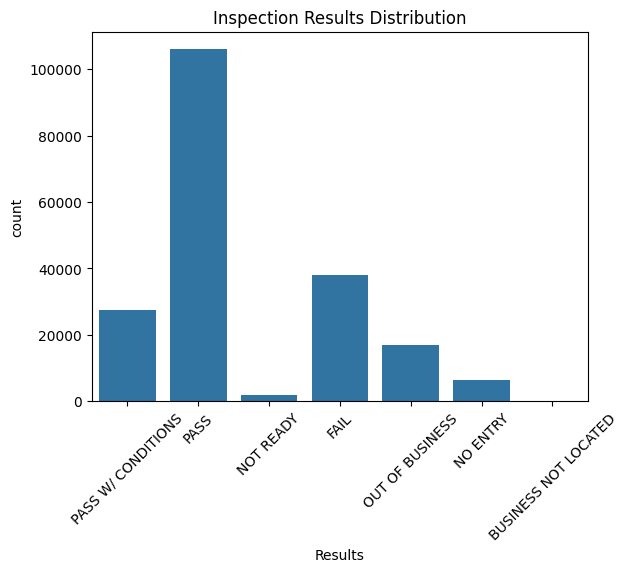

In [20]:
plt.figure()
sns.countplot(data=df, x='Results')
plt.xticks(rotation=45)
plt.title("Inspection Results Distribution")
plt.show()

## Before vs After Summary

In [21]:
summary = pd.DataFrame({
    'Before Cleaning': [df.shape[0]],
    'After Cleaning': [df.dropna().shape[0]]
})
summary

,Before Cleaning,After Cleaning
0,196676,0


## Annual Number of Food Inspections

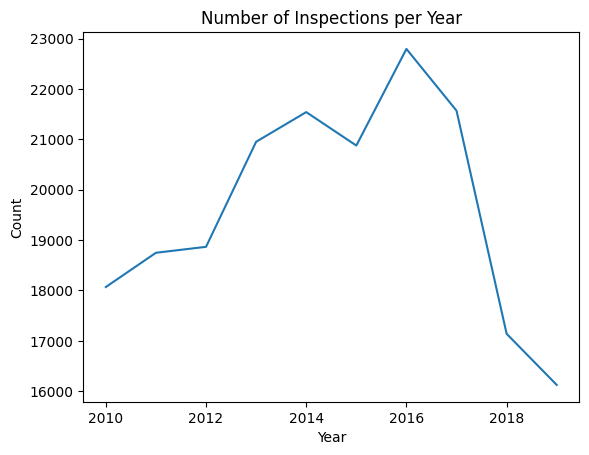

In [24]:
inspections_per_year = df['Year'].value_counts().sort_index()

plt.figure()
inspections_per_year.plot(kind='line')
plt.title('Number of Inspections per Year')
plt.ylabel('Count')
plt.xlabel('Year')
plt.show()

## What I Learned

- Data cleaning takes more effort than expected but directly impacts the quality of insights.
- Simple visual checks (missing values, distributions) can quickly reveal major data issues.
- Small cleaning steps like fixing text and dates make a big difference in usability.
- Validating changes after cleaning is just as important as the cleaning itself.

Overall, this dataset was a great example of how messy real-world data can be and why careful preparation is essential.
